## Gaussian Plume (Stability Class)

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import conversion
import gplume_stability

from scipy.integrate import trapz

# Grid and Constants

Rate is the assumed release rate in kg/h and height in meters. The grid size is also in meters. In this specific case, the x- and y- domain are 500 meters with a resoluton of 5 meters. The concentration is computed up to a height of 11 meters with a resolution of 0.5 meters.

The sources is placed in the in the coordinate $(x,y) -> (0,0)$ and $H$ is the height where the methane is relea

In [50]:
rate = 0.72 # kg/hr
H = 1.3 # m

xGrid = np.arange(0.1,500,5) # m
yGrid = np.arange(-250,250,5) # m
zGrid = np.arange(0.1,11,0.5) #m

pointSource =gplume_stability.pointSource(0,0,0,rate,H)
grid = gplume_stability.receptorGrid(xGrid,yGrid,zGrid)

## Meteorology and Stability Class

To determine the proper stability class, the following table can be used:

![](https://tleblancreu11.files.wordpress.com/2011/07/stability-chart.png)

In this example, stability class C is chosen

In [51]:
U =  5.467 # m/s
stability = gplume_stability.stabilityClass('C')

# Concentration

The concentration obtained is obtained and is shown in the plot below. In this case the plume in the plot is in obtained at a height of 1m.

The array "conc" is a 3D array with a structure of $(z,y,x)$ where $z$ corresponds to the vertical layer, and $y$ and $x$ correspond to the horizontal extent

C:\Users\mrp\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


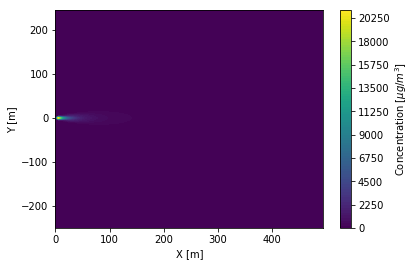

In [52]:
a = gplume_stability.gaussianPlume(pointSource,grid,stability,U)

concField = a.calculateConcentration()
concField = concField*1e6     ## convert concentration from g/m3 to ug/m3

fig = plt.figure()
ax = fig.add_subplot(111)
c = ax.contourf(xGrid, yGrid, concField[1,:,:],100)
cb = fig.colorbar(c)
cb.set_label('Concentration $[\mu g/m^3]$')
ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')
fig.show()

## TRANSECT

The plot below shows the mixing ratio being sampled 100 meters away from the source. 

Text(0,0.5,'$CH_4$ (ppm)')

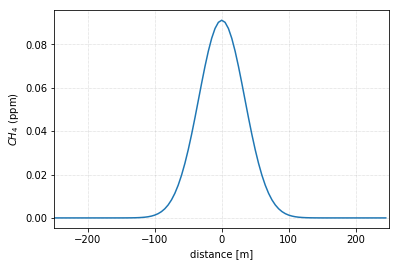

In [53]:
ppm_conc = conversion.micro2ppm(concField, mass=16.04)

fig, ax = plt.subplots()
ax.plot(yGrid, ppm_conc[1,:,60])
ax.grid(linewidth=0.5, color="grey", linestyle="dotted", alpha=0.65)
ax.set_xlim([-250, 250])
ax.set_xlabel("distance [m]")
ax.set_ylabel("$CH_4$ (ppm)")

The plot below shows the vetical profile taken from the centerline of the plume at a distance of 100 meters away from the soruce (ppm_conc[:,50,20] i.e., 50 is the centerline of the plume and 20 is 100 meters away from the source.

Text(0,0.5,'distance [m]')

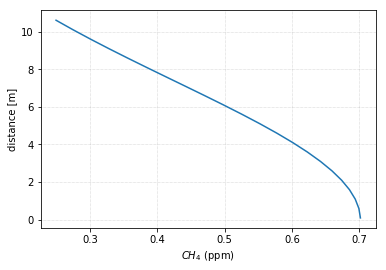

In [54]:
fig, ax = plt.subplots()
ax.plot(ppm_conc[:,50,20], zGrid)
ax.grid(linewidth=0.5, color="grey", linestyle="dotted", alpha=0.65)
ax.set_xlabel("$CH_4$ (ppm)")
ax.set_ylabel("distance [m]")

## FLUX ESTIMATION

At a 100 meter distance downwind, the flux can be estimated by integrating the plume at the sampling height then multiplying it to the mean wind speed. In this case, the sampling height is at 2 meters

In [55]:
integral = trapz(x=yGrid, y=concField[4,:,20]) # conc[4,:,20] index 4 means that it is taken at a height of 2 meters (0.5m * 4)
flux = integral * U


print("The estimated flux is %8.2f ug/s" % flux)

The estimated flux is 74816.65 ug/s
